In [2]:
require(dplyr)
require(ggplot2)
require(colorRamps)
require(cowplot)
require(gridExtra)

Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: ggplot2
Loading required package: colorRamps
Loading required package: cowplot

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave

Loading required package: gridExtra

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



In [3]:
TAK_Data=read.table("TAK_data.ext.dat",header=TRUE)

In [4]:
TAK_Data%>%colnames

[1] "SYSTEM"        "TAKID"         "FRAME"         "TIME"         
[5] "ZAngle"        "TAK_CENTER_Z"  "MEMB_CENTER_Z" "TAK_DeltaZ"

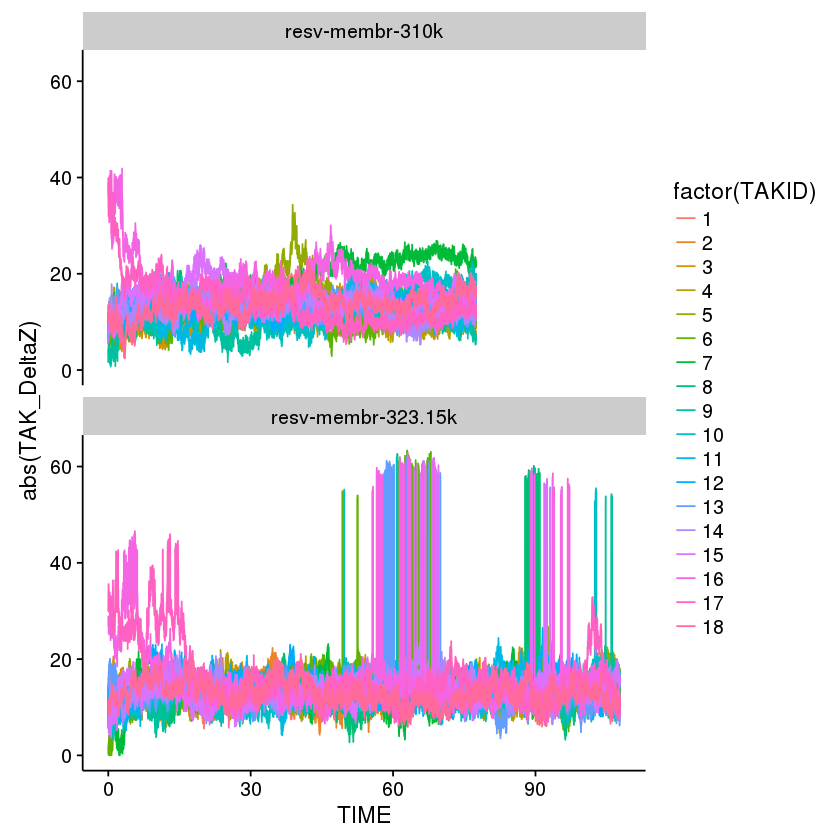

In [9]:
TAK_Data %>% ggplot(aes(x=TIME,y=abs(TAK_DeltaZ),color=factor(TAKID)))+
    geom_line()+
    facet_wrap(~SYSTEM,nrow = 2)

In [10]:
TAK_Data$TEMPERATURE=mapply(function(sys){
    if(sys=="resv-membr-310k"){
        310
    } else if (sys=="resv-membr-323.15k") {
        323.15
    } else {
        NA
    }},TAK_Data$SYSTEM
)

In [11]:
Rgas=0.00198588
TAK_Data<-TAK_Data %>% 
    mutate(Beta=Rgas*TEMPERATURE)


In [19]:
sign(-3.0)

[1] -1

Warning message:
“`panel.margin` is deprecated. Please use `panel.spacing` property instead”Warning message:
“`panel.margin` is deprecated. Please use `panel.spacing` property instead”

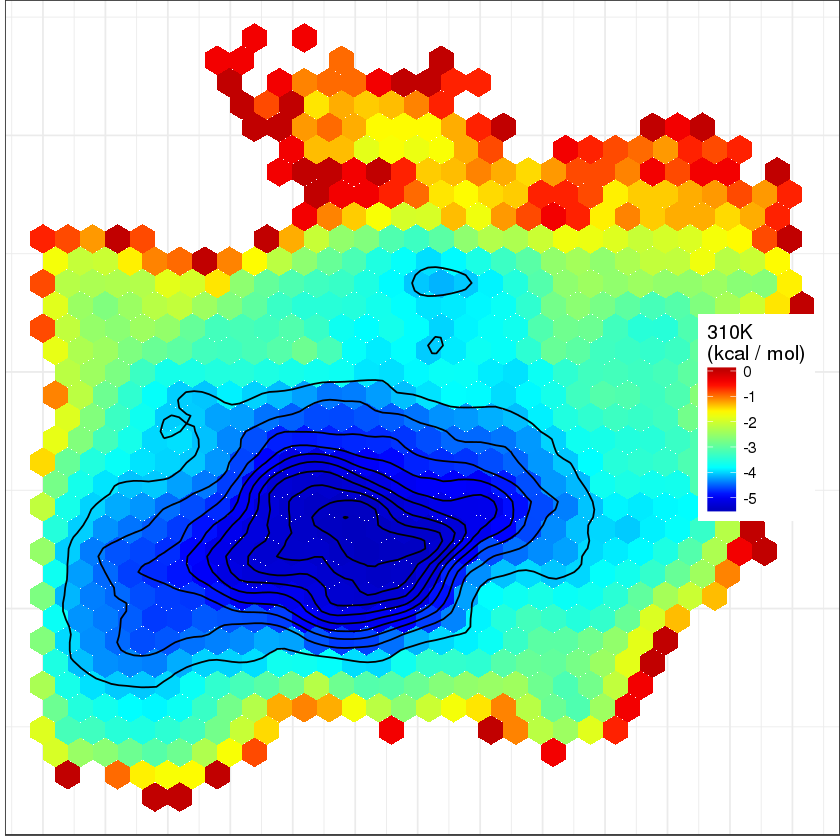

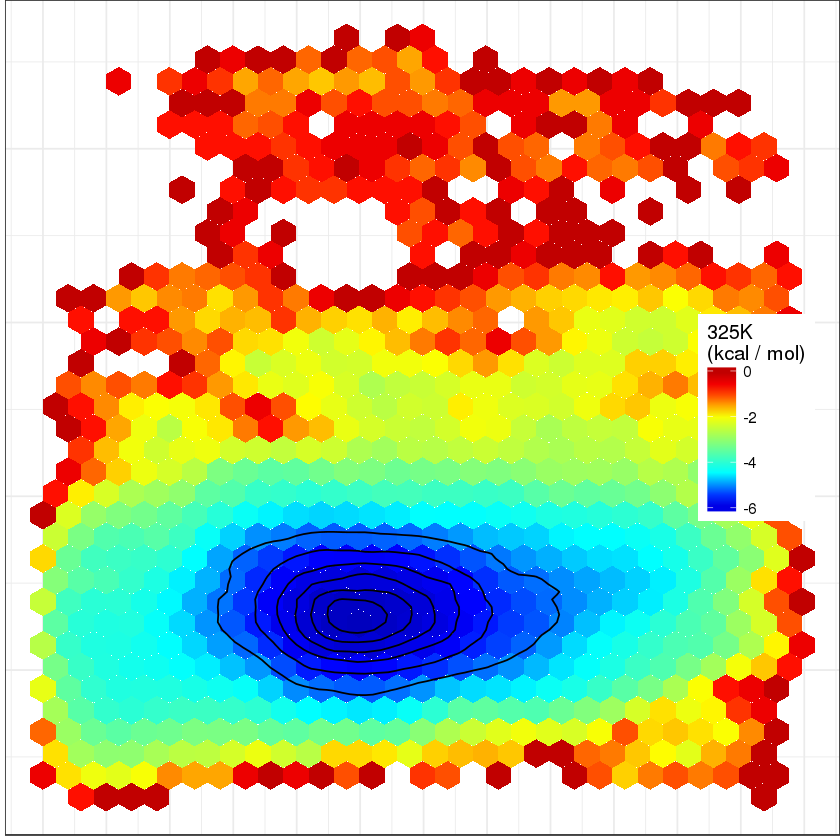

In [12]:
TAK_310_LANDSCAPE_PLOT<-TAK_Data%>%filter(TIME >= 10.0,SYSTEM=="resv-membr-310k",abs(TAK_DeltaZ)<50.0) %>%
    ggplot(aes(y=abs(TAK_DeltaZ),x=90+(ZAngle-90)*sign(TAK_DeltaZ)))+
        geom_hex(aes(fill=-310*0.00198588*log(..density../min(..density..))))+
        stat_density_2d(color="black")+
        scale_color_continuous(guide = "none")+
        scale_fill_gradientn(colours=colorRamps::matlab.like2(256))+
        scale_x_continuous(breaks=c(0:12)*15)+
        labs(fill="310K\n(kcal / mol)")+
        xlab("Orientation Angle (degrees)")+
        ylab("Depth (Angstroms)")+
        theme_bw(base_size = 12)+
        theme(legend.position=c(.9,.5),
              axis.line=element_blank(),
              axis.text.x=element_blank(),
              axis.text.y=element_blank(),
              axis.ticks=element_blank(),
              axis.title.x=element_blank(),
              axis.title.y=element_blank(),
              plot.margin = rep(unit(0,"null"),4),
              panel.margin = unit(0,"null"))
TAK_323_LANDSCAPE_PLOT<-TAK_Data%>%filter(TIME >= 10.0,SYSTEM=="resv-membr-323.15k",abs(TAK_DeltaZ)<50.0) %>%
    ggplot(aes(y=abs(TAK_DeltaZ),x=90+(ZAngle-90)*sign(TAK_DeltaZ)))+
        geom_hex(aes(fill=-323.15*0.00198588*log(..density../min(..density..))))+
        stat_density_2d(color="black")+
        scale_color_continuous(guide = "none")+
        scale_fill_gradientn(colours=colorRamps::matlab.like2(256))+
        scale_x_continuous(breaks=c(0:12)*15)+
        labs(fill="325K\n(kcal / mol)")+
        xlab("Orientation Angle (degrees)")+
        ylab("Depth (Angstroms)")+
        theme_bw(base_size = 12)+
        theme(legend.position=c(.9,.5),
              axis.line=element_blank(),
              axis.text.x=element_blank(),
              axis.text.y=element_blank(),
              axis.ticks=element_blank(),
              axis.title.x=element_blank(),
              axis.title.y=element_blank(),
              plot.margin = rep(unit(0,"null"),4),
              panel.margin = unit(0,"null"))
show(TAK_310_LANDSCAPE_PLOT)
show(TAK_323_LANDSCAPE_PLOT)

In [13]:
TAK_310_DEPTH_PROFILE_PLOT<-TAK_Data%>%filter(TIME >= 10.0,SYSTEM=="resv-membr-310k",abs(TAK_DeltaZ)<50.0) %>%
    ggplot(aes(x=abs(TAK_DeltaZ)))+
        geom_density(aes(y=-310*0.00198588*log(..density../min(..density..))))+
        scale_fill_gradientn(colours=colorRamps::matlab.like2(256))+
        labs(fill="310K\n(kcal / mol)")+
        xlab("Depth (Angstroms)")+ylab("Energy")+coord_flip()+theme_bw(base_size=12)+
        theme(axis.text.x=element_blank(),
              axis.ticks.x=element_blank(),
              axis.title.x=element_blank(),
              plot.margin = rep(unit(0,"null"),4),
              panel.margin = unit(0,"null"))
TAK_323_DEPTH_PROFILE_PLOT<-TAK_Data%>%filter(TIME >= 10.0,SYSTEM=="resv-membr-323.15k",abs(TAK_DeltaZ)<50.0) %>%
    ggplot(aes(x=abs(TAK_DeltaZ)))+
        geom_density(aes(y=-323.15*0.00198588*log(..density../min(..density..))))+
        scale_fill_gradientn(colours=colorRamps::matlab.like2(256))+
        labs(fill="323K\n(kcal / mol)")+
        xlab("Depth (Angstroms)")+ylab("Energy")+coord_flip()+theme_bw(base_size=12)+
        theme(axis.text.x=element_blank(),
              axis.ticks.x=element_blank(),
              axis.title.x=element_blank(),
              plot.margin = rep(unit(0,"null"),4),
              panel.margin = unit(0,"null"))
TAK_310_ANGLE_PROFILE_PLOT<-TAK_Data%>%filter(TIME >= 10.0,SYSTEM=="resv-membr-310k",abs(TAK_DeltaZ)<50.0) %>%
    ggplot(aes(x=90+(ZAngle-90)*sign(TAK_DeltaZ)))+
        geom_density(aes(y=310*0.00198588*log(..density../min(..density..))))+
        scale_fill_gradientn(colours=colorRamps::matlab.like2(256))+
        labs(fill="310K\n(kcal / mol)")+scale_y_continuous(breaks=c(0:6),labels=-1*c(0:6))+
        xlab("Orientation Angle (degrees)")+ylab("Energy")+theme_bw(base_size=12)+
        theme(axis.text.x=element_blank(),axis.text.y=element_blank(),
              axis.ticks=element_blank(),
              axis.title.x=element_blank(),axis.title.y=element_blank(),
              plot.margin = rep(unit(0,"null"),4),
              panel.margin = unit(0,"null"))
TAK_323_ANGLE_PROFILE_PLOT<-TAK_Data%>%filter(TIME >= 10.0,SYSTEM=="resv-membr-323.15k",abs(TAK_DeltaZ)<50.0) %>%
    ggplot(aes(x=90+(ZAngle-90)*sign(TAK_DeltaZ)))+
        geom_density(aes(y=-323.15*0.00198588*log(..density../min(..density..))))+
        scale_fill_gradientn(colours=colorRamps::matlab.like2(256))+
        labs(fill="323K\n(kcal / mol)")+
        xlab("Orientation Angle (degrees)")+ylab("Energy")+theme_bw(base_size=12)+
        theme(axis.text.y=element_blank(),
              axis.ticks.y=element_blank(),
              axis.title.y=element_blank(),
              plot.margin = rep(unit(0,"null"),4),
              panel.margin = unit(0,"null"))


Warning message:
“`panel.margin` is deprecated. Please use `panel.spacing` property instead”Warning message:
“`panel.margin` is deprecated. Please use `panel.spacing` property instead”Warning message:
“`panel.margin` is deprecated. Please use `panel.spacing` property instead”Warning message:
“`panel.margin` is deprecated. Please use `panel.spacing` property instead”

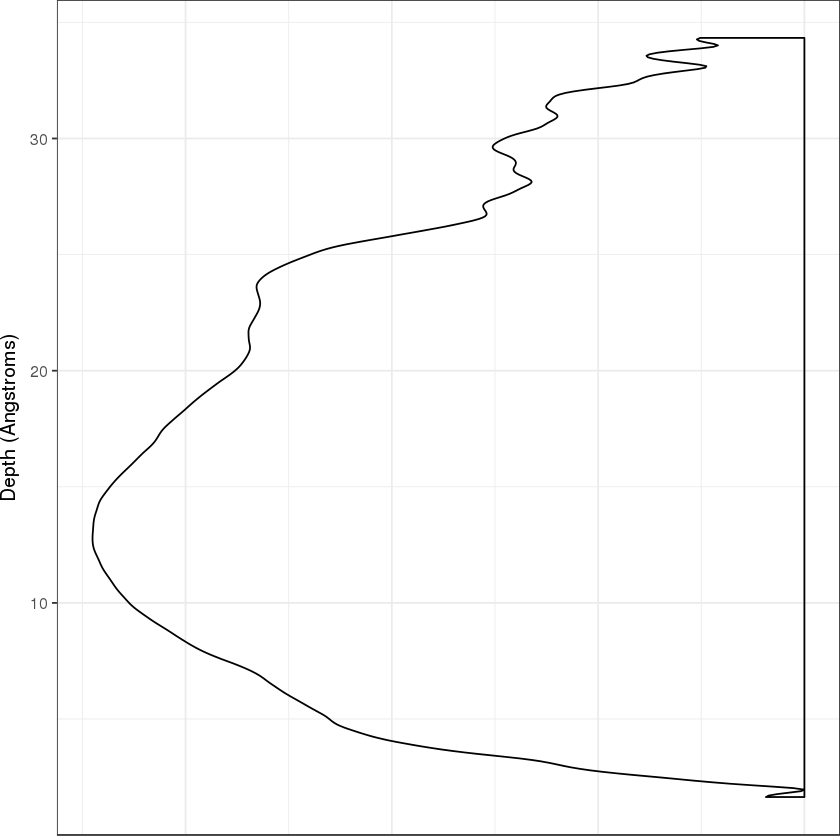

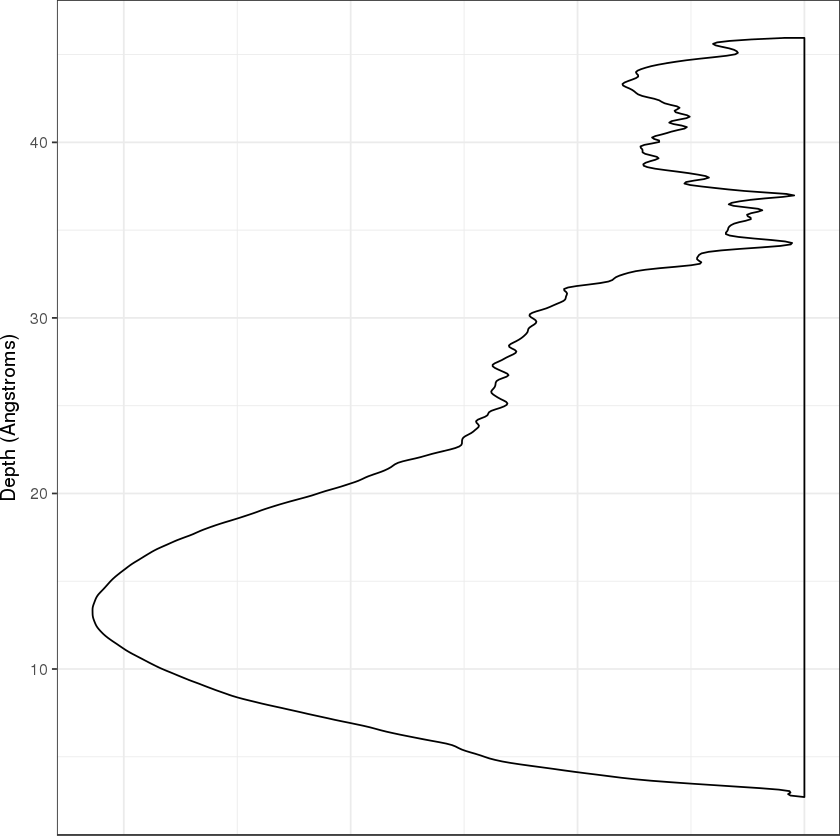

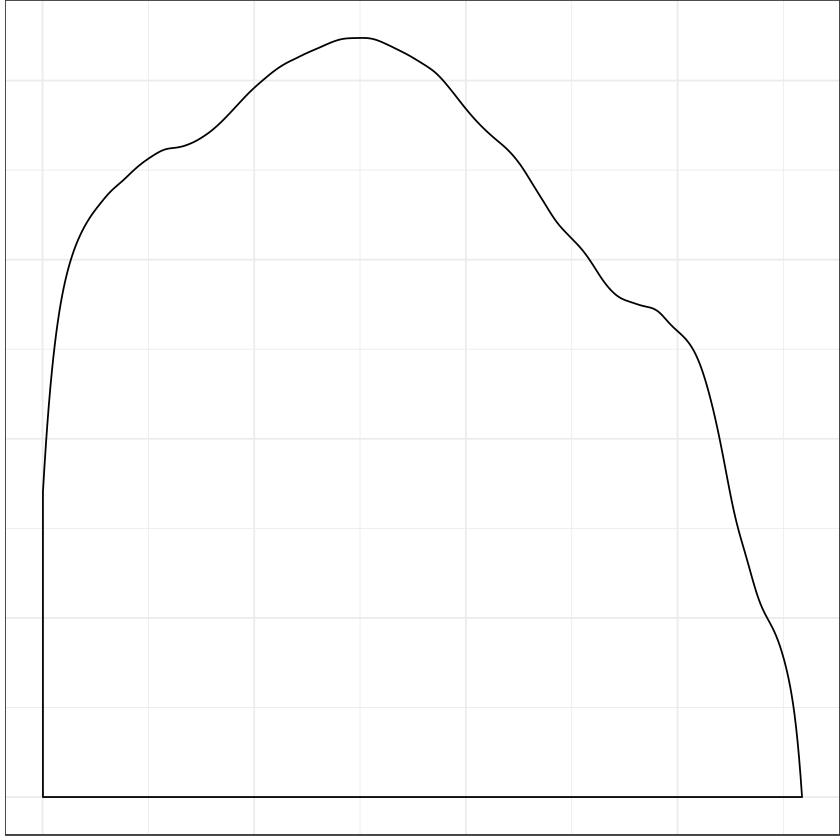

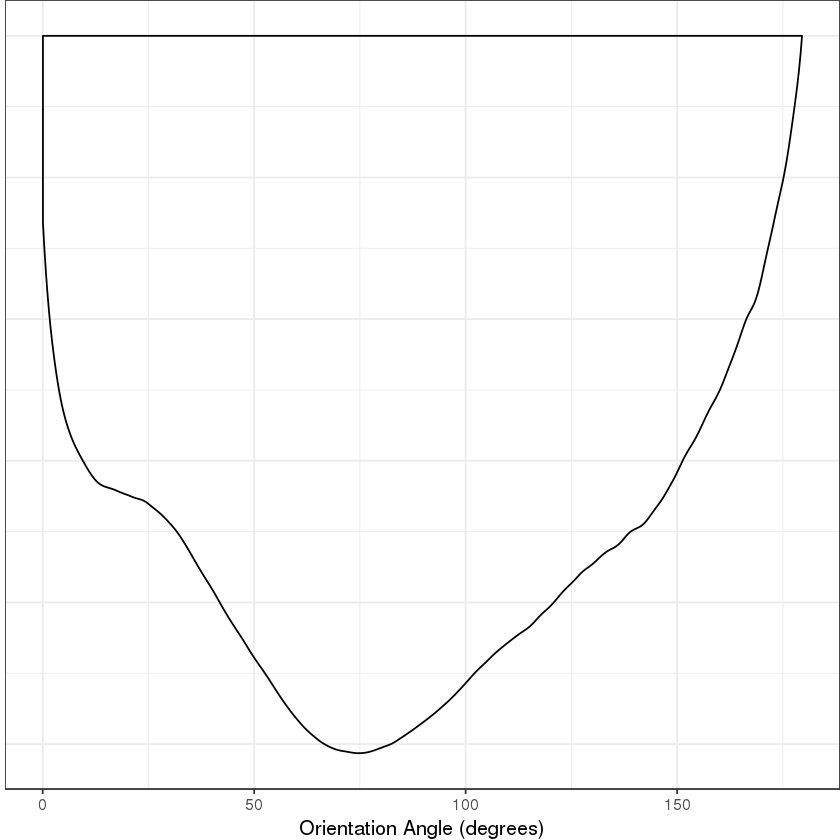

In [14]:

show(TAK_310_DEPTH_PROFILE_PLOT+coord_flip())
show(TAK_323_DEPTH_PROFILE_PLOT+coord_flip())
show(TAK_310_ANGLE_PROFILE_PLOT)
show(TAK_323_ANGLE_PROFILE_PLOT)

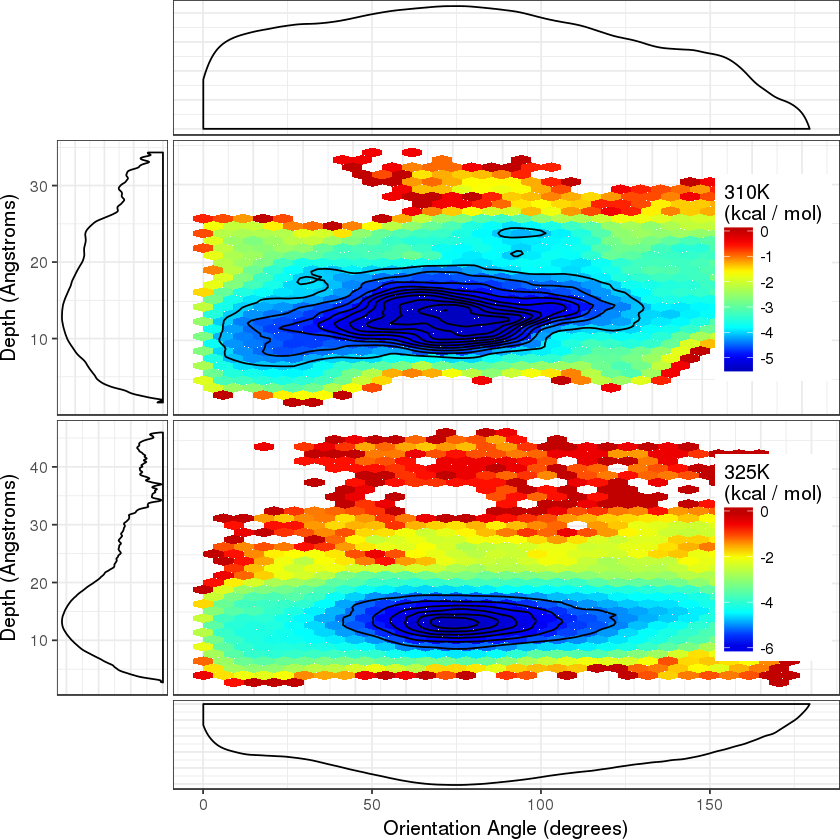

In [16]:
blankPlot <- ggplot()+geom_blank(aes(1,1))+
  theme(
    plot.background = element_blank(), 
   panel.grid.major = element_blank(),
   panel.grid.minor = element_blank(), 
   panel.border = element_blank(),
   panel.background = element_blank(),
   axis.title.x = element_blank(),
   axis.title.y = element_blank(),
   axis.text.x = element_blank(), 
   axis.text.y = element_blank(),
   axis.ticks = element_blank(),
   axis.line = element_blank()
     )
grid.arrange(blankPlot,TAK_310_ANGLE_PROFILE_PLOT,TAK_310_DEPTH_PROFILE_PLOT,TAK_310_LANDSCAPE_PLOT,
             TAK_323_DEPTH_PROFILE_PLOT,TAK_323_LANDSCAPE_PLOT,blankPlot,TAK_323_ANGLE_PROFILE_PLOT,
            ncol=2,nrow=4,widths=c(1,4),heights=c(3,6,6,3))